# Exercise 1. #

In [1]:
#Imports:
import sympy as sy
from sympy.solvers import solve

#Get Symbols and Functions:
u = sy.Symbol('u')
u_0 = sy.Symbol('u_0')
x = sy.Function('x')(u)
F = sy.Function('F')(x, u)

#Get formula for the cubic term:
solve(sy.diff(F, u, 3), sy.diff(x, u, 3))[0].subs(u, u_0)

-(Derivative(x(u_0), u_0)**3*Derivative(F(x(u_0), u_0), x(u_0), x(u_0), x(u_0)) + Derivative(x(u_0), u_0)**2*Derivative(F(x(u_0), u_0), x(u_0), x(u_0), u_0) + 3*Derivative(x(u_0), u_0)*Derivative(F(x(u_0), u_0), x(u_0), x(u_0))*Derivative(x(u_0), u_0, u_0) + Derivative(x(u_0), u_0)*Derivative(F(x(u_0), u_0), u_0, x(u_0), u_0) + Derivative(x(u_0), u_0)*Derivative(F(x(u_0), u_0), x(u_0), u_0, u_0) + Derivative(F(x(u_0), u_0), u_0, x(u_0))*Derivative(x(u_0), u_0, u_0) + 2*Derivative(F(x(u_0), u_0), x(u_0), u_0)*Derivative(x(u_0), u_0, u_0) + Derivative(F(x(u_0), u_0), u_0, u_0, u_0))/Subs(Derivative(F(_xi_1, u_0), _xi_1), (_xi_1,), (x(u_0),))

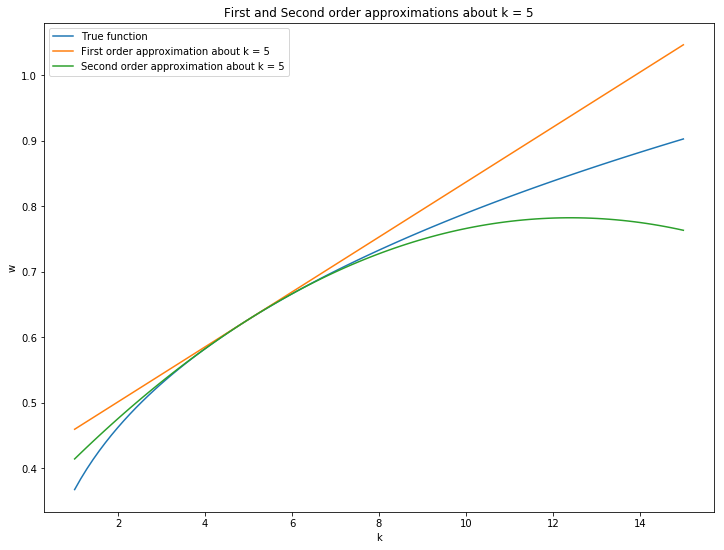

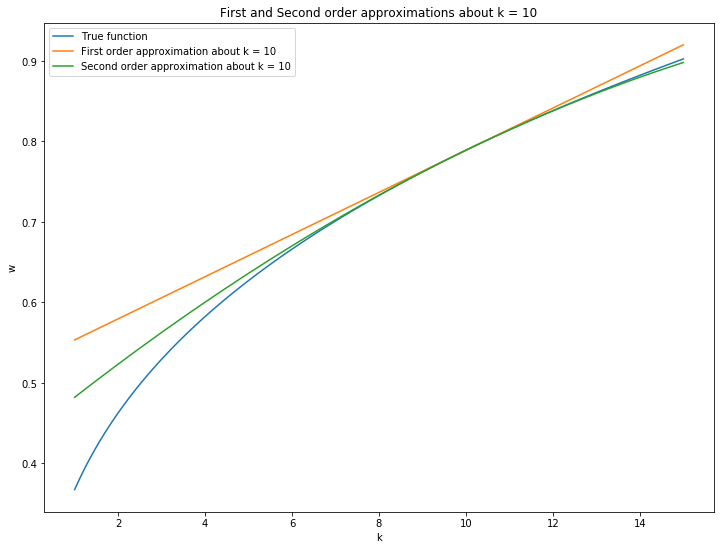

In [2]:
#Imports:
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
import matplotlib.pyplot as plt

#Parameter values:
k = 5
alpha = 0.33
z = 1
b = 2
t = 0.11
h = 24
params = np.array([alpha, z, b, t, h])

#Get labor demand, labor supply, and profit functions:
def labor_demand(w, k, params):
    alpha, z, b, t, h = params
    return ((((1 - alpha) * z) / w) ** (1 / alpha)) * k

def profit(w, k, params):
    alpha, z, b, t, h = params
    return z * (k ** alpha) * (labor_demand(w, k, params) ** (1 - alpha)) - (w * labor_demand(w, k, params))

def labor_supply(w, k, params):
    alpha, z, b, t, h = params
    return h - (b / (w * (1 + b))) * (w * h + profit(w, k, params) - t)

#Get error function:
def error(w, k, params):
    return abs(labor_supply(w, k, params) - labor_demand(w, k, params))

#Define a function that returns the market-clearing wage rate, given parameters:
def get_w_star(k, params):
    w_star = minimize_scalar(error, bounds=(1e-10, k), args=(k, params), method='Bounded').x
    return w_star

#Define a first and second order approximation for wage as a function of k about k = 5:
first_approx_5 = lambda k, params: get_w_star(5, params) + derivative(get_w_star, 5, args=(params,)) * (k - 5)
second_approx_5 = lambda k, params: first_approx_5(k, params) + (derivative(get_w_star, 5, args=(params,), n=2) * (k - 5) ** 2) / 2

#Define a first and second order approximation for wage as a function of k about k = 10:
first_approx_10 = lambda k, params: get_w_star(10, params) + derivative(get_w_star, 10, args=(params,)) * (k - 10)
second_approx_10 = lambda k, params: first_approx_10(k, params) + (derivative(get_w_star, 10, args=(params,), n=2) * (k - 10) ** 2) / 2

#Get capital grid:
k_grid = np.linspace(1, 15, 100)

#Plot the first and second order approximations about k = 5, as well as the true function:
fig = plt.figure(figsize=(12, 9))
plt.plot(k_grid, [get_w_star(k, params) for k in k_grid], label='True function')
plt.plot(k_grid, [first_approx_5(k, params) for k in k_grid], label='First order approximation about k = 5')
plt.plot(k_grid, [second_approx_5(k, params) for k in k_grid], label='Second order approximation about k = 5')
plt.title('First and Second order approximations about k = 5')
plt.xlabel('k')
plt.ylabel('w')
plt.legend()
plt.show()

#Plot the first and second order approximations about k = 10, as well as the true function:
fig = plt.figure(figsize=(12, 9))
plt.plot(k_grid, [get_w_star(k, params) for k in k_grid], label='True function')
plt.plot(k_grid, [first_approx_10(k, params) for k in k_grid], label='First order approximation about k = 10')
plt.plot(k_grid, [second_approx_10(k, params) for k in k_grid], label='Second order approximation about k = 10')
plt.title('First and Second order approximations about k = 10')
plt.xlabel('k')
plt.ylabel('w')
plt.legend()
plt.show()

# Exercise 3. #

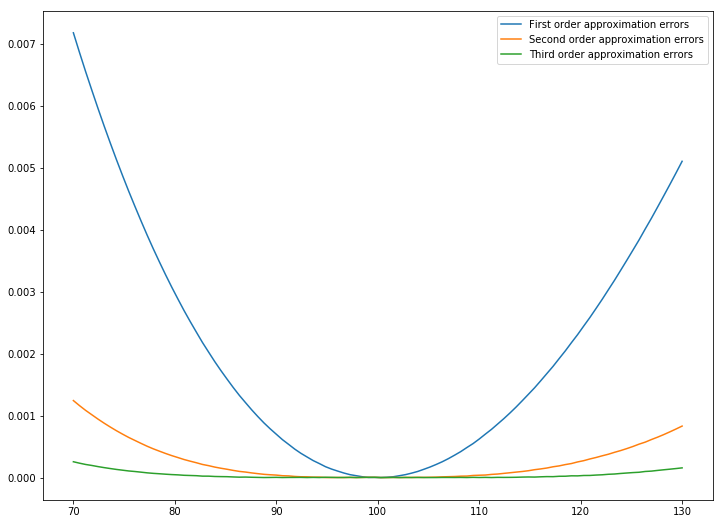

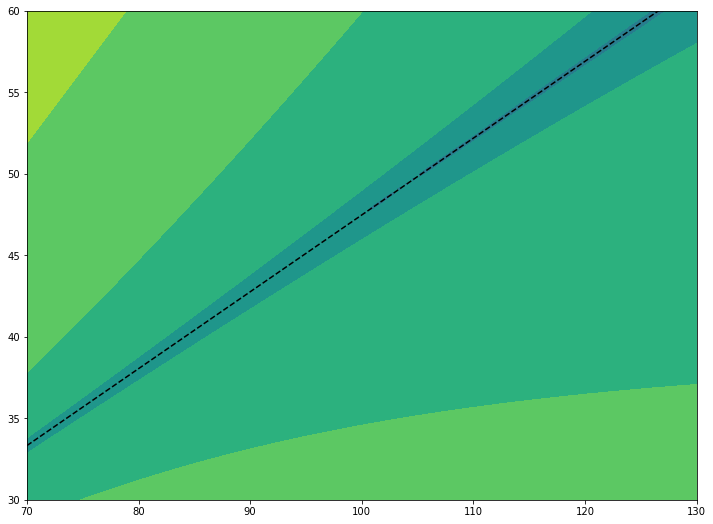

In [3]:
#Imports:
import numpy as np
import sympy as sy
from sympy.solvers import solve
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

#Set x_0 and y_0 value:
x_0 = 100
y_0 = 47.465785681252072

#Get Symbols and Functions:
x = sy.Symbol('x')
G = sy.Function('G')(x)
Gp = sy.Symbol('Gp')
Gpp = sy.Symbol('Gpp')
Gppp = sy.Symbol('Gppp')
F = (x ** 0.35 + 0.9 * x - G) ** -2.5 - 0.95 * (G ** 0.35 + 0.9 * G) ** -2.5
Gp = solve(sy.diff(F, x).subs([(sy.diff(G, x), Gp), (G, y_0), (x, x_0)]))[0]
Gpp = solve(sy.diff(F, x, 2).subs([(sy.diff(G, x, 2), Gpp), (sy.diff(G, x), Gp), (G, y_0), (x, x_0)]))[0]
Gppp = solve(sy.diff(F, x, 3).subs([(sy.diff(G, x, 3), Gppp), (sy.diff(G, x, 2), Gpp), (sy.diff(G, x), Gp), (G, y_0), (x, x_0)]))[0]

#Define an error function:
def error(y, x):
    return abs((x ** 0.35 + 0.9 * x - y) ** -2.5 - 0.95 * (y ** 0.35 + 0.9 * y) ** -2.5)

#Get y_star given x:
def get_y_star(x):
    y_star = minimize_scalar(error, bounds=(25, 75), args=(x,), method='Bounded').x
    return y_star

#Define first, second and third order approximation for y as a function of x about x = 100:
first_approx = lambda x: y_0 + Gp * (x - x_0)
second_approx = lambda x: first_approx(x) + (Gpp * (x - x_0) ** 2) / 2
third_approx = lambda x: second_approx(x) + (Gppp * (x - x_0) ** 3) / 6

#Define grids for x and y (I thought using a larger domain for the grid was more interesting):
x_grid = np.linspace(70, 130, 100)
y_grid = np.linspace(30, 60, 100)

#Get the approximated values, as well as the true values:
first_approx_vals = first_approx(x_grid)
second_approx_vals = second_approx(x_grid)
third_approx_vals = third_approx(x_grid)
true_vals = [get_y_star(x) for x in x_grid]

#Plot errors:
fig = plt.figure(figsize=(12, 9))
plt.plot(x_grid, abs(first_approx_vals - true_vals), label='First order approximation errors')
plt.plot(x_grid, abs(second_approx_vals - true_vals), label='Second order approximation errors')
plt.plot(x_grid, abs(third_approx_vals - true_vals), label='Third order approximation errors')
plt.legend()
plt.show()

#Plot the objective function, along with the third order approximation of its minimizers:
fig = plt.figure(figsize=(12, 9))
X, Y = np.meshgrid(x_grid, y_grid)
plt.contourf(X, Y, abs((X ** 0.35 + 0.9 * X - Y) ** -2.5 - 0.95 * (Y ** 0.35 + 0.9 * Y) ** -2.5), norm=LogNorm(), cmap='viridis')
plt.plot(x_grid, third_approx_vals, 'k--')
plt.ylim((30, 60))
plt.show()

The functional form of the cubic approximation is:

$$f(x) = 47.466 + 0.471(x - x_0) - 6.598\times10^{-6}(x - x_0)^2 + 3.659\times10^{-8}(x - x_0)^3$$

# Exercise 4. #

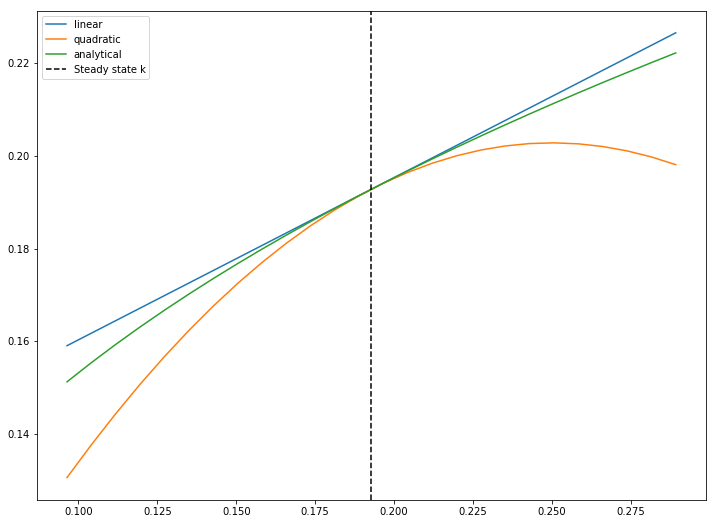

In [4]:
#Imports:
import numpy as np
import sympy as sy
from sympy.solvers import solve
import matplotlib.pyplot as plt

#Parameter values:
alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02

#Get k_bar:
k_bar = (alpha * beta) ** (1 / (1 - alpha))

#Get Symbols:
u = sy.Symbol('u')
x = sy.Function('x')(u)
y = sy.Function('y')(u)
xp = sy.Symbol('xp')
xpp = sy.Symbol('xpp')
F = (1 / (u ** alpha - x)) - ((beta * alpha * x ** (alpha - 1)) / (x ** alpha - y))
xp = float(solve(sy.diff(F, u).subs([(sy.diff(y, u), xp ** 2), (sy.diff(x, u), xp), (y, k_bar), (x, k_bar), (u, k_bar)]))[0])
xpp = float(solve(sy.diff(F, u, 2).subs([(sy.diff(y, u, 2), (xp + xp ** 2) * xpp), (sy.diff(x, u, 2), xpp), (sy.diff(y, u), xp ** 2), (sy.diff(x, u), xp), (y, k_bar), (x, k_bar), (u, k_bar)]))[0])

#Define policy functions:
def linear_pf(k):
    return k_bar * (xp * ((k - k_bar) / k_bar)) + k_bar

def quadratic_pf(k):
    return k_bar * (xp * ((k - k_bar) / k_bar) + 0.5 * xpp * ((k - k_bar) / k_bar) ** 2) + k_bar

def analytical_pf(k):
    return alpha * beta * (k ** alpha)

#Get k_grid:
k_grid = np.linspace(0.5 * k_bar, 1.5 * k_bar, 26)

#Plot policy functions:
fig = plt.figure(figsize=(12, 9))
plt.plot(k_grid, linear_pf(k_grid), label='linear')
plt.plot(k_grid, quadratic_pf(k_grid), label='quadratic')
plt.plot(k_grid, analytical_pf(k_grid), label='analytical')
plt.axvline(k_bar, c='k', ls = '--', label='Steady state k')
plt.legend()
plt.show()

I'm not sure why the quadratic is worse than the linear approximation...

# Exercise 5. #

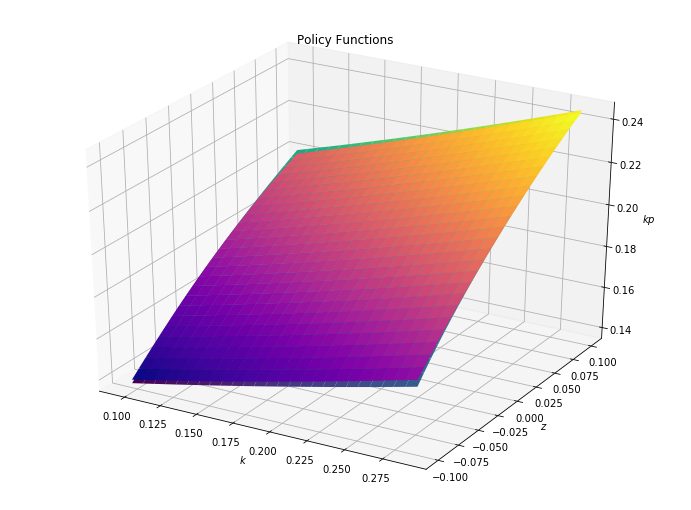

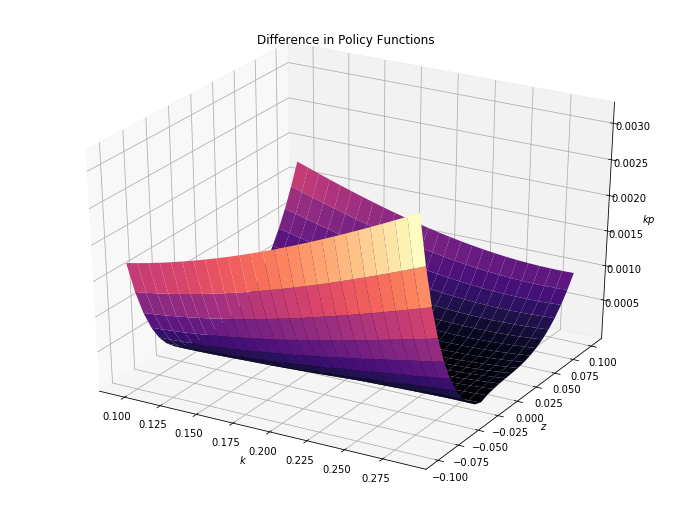

In [5]:
#Imports:
import numpy as np
import scipy.optimize as opt
import sympy as sy
from sympy import diff, lambdify
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Parameter values:
alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02
nx = 1
ny = 0
nz = 1
ns = nx+nz+1

#Get k_bar
k_bar = (alpha*beta)**(1/(1-alpha))

#Get second order derivatives:
Fyy = 2*alpha*beta*((k_bar**(alpha-1)))*((1/(k_bar**alpha-k_bar))**2)
Fyx = alpha*beta*(k_bar**alpha)*((k_bar**(alpha-1))*(1-(alpha+1)*(k_bar**(alpha-1)))+alpha)*((1/(k_bar**alpha-k_bar))**3)
Fyu = alpha*beta*alpha*((k_bar**(alpha-1))**2)*((1/(k_bar**alpha-k_bar))**2)
Fxx = alpha*beta*(k_bar**alpha)*(2*(k_bar**(alpha-1))**3+(alpha**2+3*alpha-4)*(k_bar**(alpha-1))**2-2*(2*alpha-1)*(k_bar**(alpha-1))-alpha*(alpha-1))*((1/(k_bar**alpha-k_bar))**3)
Fxu = -alpha*beta*alpha*((k_bar**(alpha-1))**2)*((k_bar**(alpha-1))+alpha-1)*((1/(k_bar**alpha-k_bar))**2)
Fuu = (alpha-1)*alpha*alpha*beta*(k_bar**(2*alpha-3))*(1/(k_bar**alpha-k_bar))

#Get F, G, H, L, M and N
F = alpha*beta*(k_bar**(alpha-1))/(k_bar**alpha-k_bar)
G = -F*(alpha+k_bar**(alpha-1))
H = F*(alpha*(k_bar**(alpha-1)))
L = -F*k_bar
M = F*(k_bar**alpha)
N = rho

#Define the jacobian:
jacobian = np.array([F,G,H,L,M])

#Get P and Q:
P = (-G-np.sqrt(G**2-4*H*F))/(2*F)
Q = -(L*N+M)/(F*N+F*P+G)

#Get xuu:
xuu = -(Fyy*(P**4)+2*Fyx*(P**3)+2*Fyu*(P**2)+Fxx*(P**2)+2*Fxu*P+Fuu)/F*(P**2)+F*P+G

#Change notation:
Hx = P
Hz = Q
Hv = 0

#Get symbols
kpp, kp, k, zp, z = sy.symbols('kpp kp k zp z')

#Gamma function:
gamma = lambda kpp, kp, k, zp, z: (alpha*beta*sy.exp(zp)*(kp**(alpha-1))*(sy.exp(z)*k**alpha-kp)/(sy.exp(zp)*kp**alpha-kpp))

#Get elements of hessian by analytical differentiation:
Fyzp = sy.lambdify((kpp, kp, k, zp, z),sy.diff(gamma(kpp, kp, k, zp, z),kpp,zp),'numpy')(k_bar,k_bar,k_bar,0,0)
Fyz = sy.lambdify((kpp, kp, k, zp, z),sy.diff(gamma(kpp, kp, k, zp, z),kpp,z),'numpy')(k_bar,k_bar,k_bar,0,0)
Fxzp = sy.lambdify((kpp, kp, k, zp, z),sy.diff(gamma(kpp, kp, k, zp, z),kp,zp),'numpy')(k_bar,k_bar,k_bar,0,0)
Fxz = sy.lambdify((kpp, kp, k, zp, z),sy.diff(gamma(kpp, kp, k, zp, z),kp,z),'numpy')(k_bar,k_bar,k_bar,0,0)
Fuzp = sy.lambdify((kpp, kp, k, zp, z),sy.diff(gamma(kpp, kp, k, zp, z),k,zp),'numpy')(k_bar,k_bar,k_bar,0,0)
Fuz = sy.lambdify((kpp, kp, k, zp, z),sy.diff(gamma(kpp, kp, k, zp, z),k,z),'numpy')(k_bar,k_bar,k_bar,0,0)
Fzpzp = sy.lambdify((kpp, kp, k, zp, z),sy.diff(gamma(kpp, kp, k, zp, z),zp,zp),'numpy')(k_bar,k_bar,k_bar,0,0)
Fzpz = sy.lambdify((kpp, kp, k, zp, z),sy.diff(gamma(kpp, kp, k, zp, z),zp,z),'numpy')(k_bar,k_bar,k_bar,0,0)
Fzz =sy.lambdify((kpp, kp, k, zp, z),sy.diff(gamma(kpp, kp, k, zp, z),z,z),'numpy')(k_bar,k_bar,k_bar,0,0)

#Define the hessian:
hessian = np.array([[Fyy,Fyx,Fyu, Fyzp, Fyz],
                    [Fyx,Fxx,Fxu, Fxzp, Fxz],
                    [Fyu,Fxu,Fuu, Fuzp, Fuz],
                    [Fyzp, Fxzp, Fuzp, Fzpzp, Fzpz],
                    [Fyz, Fxz, Fuz, Fzpz, Fzz]])

#Define the delta_SS function to get quadratic terms:
def delta_SS(Theta):
    Hxx, Hxz, Hzz, Hvv = Theta
    
    EFs = np.array([[Hx*Hx, Hx*Hz+Hz*N, Hx*Hv+Hv],
                    [Hx, Hz, Hv], [1,0,0], 
                    [0,N,0], [0,1,0]])
    
    EFss = np.array([[Hxx*Hx*Hx+Hx*Hxx, Hxx*Hx*Hz+Hx*Hxz+Hxz*Hx*N, Hxx*Hx*Hv],
                     [Hxx,Hxz,0],[0,0,0],
                     [0,0,0],[0,0,0],
                     [Hxx*Hx*Hz+Hx*Hxz+Hxz*Hx*N,Hxz*N*Hz+Hx*Hzz+Hzz*N*N,Hxz*N*Hv],
                     [Hxz,Hzz,0],[0,0,0],
                     [0,0,0],[0,0,0],
                     [Hxx*Hx*Hv,Hxz*N*Hv,Hx*Hvv+Hvv],
                     [0,0,Hvv],[0,0,0],
                     [0,0,0],[0,0,0]])
    
    Ehat = ((np.kron(EFs,np.identity(nx+ny))).T@hessian)@EFs
    
    Ehat[2,2] = 0
    
    return (Ehat+np.kron(np.identity(ns),jacobian)@EFss).ravel()

#Use opt.root to get quadratic terms:
Hxx, Hxz, Hzz, Hvv = opt.root(delta_SS,np.array([xuu,1,1,1]),method='lm').x

#Get k_grid and z_grid:
k_grid = np.linspace(0.5 * k_bar, 1.5 * k_bar, 26)
z_grid = np.linspace(-5 * sigma, 5 * sigma, 26)
X, Y = np.meshgrid(k_grid, z_grid)

#Define the policy functions:
PF_grid_numerical = np.asarray([(k_bar+Hx*(k_grid-k_bar)+Hz*z_grid[i]+0.5*(Hxx*(k_grid-k_bar)**2+Hzz*z_grid[i]**2)+Hxz*(k_grid-k_bar)*z_grid[i]+Hvv) for i in range(26)]).T
PF_grid_analytical = np.asarray([alpha*beta*np.exp(z_grid[i])*(k_grid**alpha) for i in range(26)]).T

#Plot the policy functions:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, PF_grid_numerical, cmap='plasma')
ax.plot_surface(X, Y, PF_grid_analytical, cmap='viridis')
ax.set_title('Policy Functions')
ax.set_xlabel('$k$')
ax.set_ylabel('$z$')
ax.set_zlabel('$kp$')
plt.show()

#Plot the difference:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, np.absolute(PF_grid_numerical - PF_grid_analytical), cmap='magma')
ax.set_title('Difference in Policy Functions')
ax.set_xlabel('$k$')
ax.set_ylabel('$z$')
ax.set_zlabel('$kp$')
plt.show()